In [16]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [102]:
data_dir = "/om2/group/halassa/PFCMD-ali-sabrina/011921_file-per-trial/by_trial"
s_trial = 0
t_trial = 2999

# each neuron's activity is a row; column index is trial number
inpMD_trial_avgs = np.array([])
rPFC_trial_avgs = np.array([])
    
for i in range(s_trial, t_trial+1):
    with open(data_dir + "/" + str(i) + ".json") as json_file:
        data = json.load(json_file)
        
        inpMD = np.array(data["network_rates"]["MD_input"])
        inpMD_trial_avg = np.mean(inpMD, axis=0).reshape(-1,1)
        rPFC = np.array(data["network_rates"]["r_PFC"])
        rPFC_trial_avg = np.mean(rPFC, axis=0).reshape(-1,1)
        
        if i == s_trial:
            inpMD_trial_avgs = inpMD_trial_avg
            rPFC_trial_avgs = rPFC_trial_avg
        else:
            inpMD_trial_avgs = np.hstack((inpMD_trial_avgs, inpMD_trial_avg))
            rPFC_trial_avgs = np.hstack((rPFC_trial_avgs, rPFC_trial_avg))
        

In [156]:
def correlation(x,y):
    linear_model = np.polyfit(x, y, 1)
    linear_model_fn = np.poly1d(linear_model)
    x_s = np.arange(min(x), max(x))
    corr, _ = stats.pearsonr(x, y)
    return (x_s, linear_model_fn(x_s), corr)

def running_correlation(x,y,bin_size=200):
    corrs = []
    
    for i in range(len(x) - bin_size):
        bin_x = x[i:i+bin_size]
        bin_y = y[i:i+bin_size]
        (_, _, corr) = correlation(bin_x, bin_y)
        corrs.append(corr)
    return corrs

save_dir = "/om2/group/halassa/PFCMD-ali-sabrina/011921_file-per-trial/plots/pearson/"
plt.clf()
for i in range(50, len(rPFC_trial_avgs[:]), 15):
    print(str(i) + "/" + str(len(rPFC_trial_avgs[:])))
    
    fig, ax = plt.subplots(5, 2, figsize=(15, 10))
    fig.tight_layout(h_pad=3)

    # == Plot Z-scored == 

    s = 2000
    t = 2499

    z_rPFCi = stats.zscore(rPFC_trial_avgs[i,s:t])
    z_inpMD0 = stats.zscore(inpMD_trial_avgs[0,s:t])
    z_inpMD1 = stats.zscore(inpMD_trial_avgs[1,s:t])

    d_rPFCi = np.diff(z_rPFCi)
    d_inpMD0 = np.diff(z_inpMD0)
    d_inpMD1 = np.diff(z_inpMD1)

    # MD0 and rPFC lines
    ax[0,0].plot(z_inpMD0, c='blue')
    ax[0,0].plot(z_rPFCi, c='grey')
    ax[0,0].set_xticklabels(ax[0,0].get_xticks() + s)
    ax[0,0].set_title('Trials avg activity')
    ax[0,0].set_xlabel('trial #')
    ax[0,0].set_ylabel('blue=MD0, grey=PFC')

    # MD1 and rPFC lines
    ax[2,0].plot(z_inpMD1, c='orange')
    ax[2,0].plot(z_rPFCi, c='grey')
    ax[2,0].set_xticklabels(ax[2,0].get_xticks() + s)
    ax[2,0].set_title('Trials avg activity')
    ax[2,0].set_xlabel('trial #')
    ax[2,0].set_ylabel('orange=MD1, grey=PFC')

    # MD0 and rPFC correlation
    ax[0,1].scatter(z_rPFCi, z_inpMD0, color='blue', linewidths=0.0)
    (x_s, y_s, corr) = correlation(z_rPFCi, z_inpMD0)
    ax[0,1].plot(x_s, y_s, color="black")
    ax[0,1].set_xlabel('PFC activity')
    ax[0,1].set_ylabel('MD0 activity')
    ax[0,1].set_title('MD0 vs rPFC (avg trial activity), r=%.3f' % corr)

    # MD1 and rPFC correlation
    ax[2,1].scatter(z_rPFCi, z_inpMD1, color='orange', linewidths=0.0)
    (x_s, y_s, corr) = correlation(z_rPFCi, z_inpMD1)
    ax[2,1].plot(x_s, y_s, color="black")
    ax[2,1].set_xlabel('PFC activity')
    ax[2,1].set_ylabel('MD1 activity')
    ax[2,1].set_title('MD1 vs rPFC (avg trial activity), r=%.3f' % corr)

    # MD0 and rPFC trial deltas lines
    ax[1,0].plot(d_inpMD0, c='blue')
    ax[1,0].plot(d_rPFCi, c='grey')
    ax[1,0].set_xticklabels(ax[1,0].get_xticks() + s)
    ax[1,0].set_title('Deltas of consecutivy trials avg activity')
    ax[1,0].set_xlabel('trial #')
    ax[1,0].set_ylabel('blue=MD0, grey=PFC')

    # MD1 and rPFC trial deltas lines
    ax[3,0].plot(d_inpMD1, c='orange')
    ax[3,0].plot(d_rPFCi, c='grey')
    ax[3,0].set_xticklabels(ax[3,0].get_xticks() + s)
    ax[3,0].set_title('Deltas of consecutivy trials avg activity')
    ax[3,0].set_xlabel('trial #')
    ax[3,0].set_ylabel('orange=MD1, grey=PFC')

    # MD0 and rPFC trial deltas correlation
    ax[1,1].scatter(d_rPFCi, d_inpMD0, color='blue', linewidths=0.0)
    (x_s, y_s, corr) = correlation(d_rPFCi, d_inpMD0)
    ax[1,1].plot(x_s, y_s, color="black")
    ax[1,1].set_xlabel('PFC activity (trial deltas)')
    ax[1,1].set_ylabel('MD0 activity (trial deltas)')
    ax[1,1].set_title('MD0 vs rPFC (deltas of consecutive trials avg activity), r=%.3f' % corr)

    # MD1 and rPFC trial deltas correlation
    ax[3,1].scatter(d_rPFCi, d_inpMD1, color='orange', linewidths=0.0)
    (x_s, y_s, corr) = correlation(d_rPFCi, d_inpMD1)
    ax[3,1].plot(x_s, y_s, color="black")
    ax[3,1].set_xlabel('PFC activity (trial deltas)')
    ax[3,1].set_ylabel('MD1 activity (trial deltas)')
    ax[3,1].set_title('MD1 vs rPFC (deltas of consecutive trials avg activity), r=%.3f' % corr)

    corrs_x = stats.zscore(rPFC_trial_avgs[i,0:3000])
    corrs_y0 = stats.zscore(inpMD_trial_avgs[0,0:3000])
    corrs_y1 = stats.zscore(inpMD_trial_avgs[1,0:3000])

    corrs0_50 = running_correlation(corrs_x, corrs_y0, 50)
    corrs0_150 = running_correlation(corrs_x, corrs_y0, 150)
    corrs0_300 = running_correlation(corrs_x, corrs_y0, 300)
    ax[4,0].plot(corrs0_50, color='lightsteelblue', label='bin=50')
    ax[4,0].plot(corrs0_150, color='dodgerblue', label='bin=150')
    ax[4,0].plot(corrs0_300, color='blue', label='bin=300')
    ax[4,0].set_title('MD0 vs rPFC Pearson corr coeff over trials')
    ax[4,0].set_xlabel('trial #')
    ax[4,0].set_ylabel('bin size = 50, 150, 300')

    corrs1_50 = running_correlation(corrs_x, corrs_y1, 50)
    corrs1_150 = running_correlation(corrs_x, corrs_y1, 150)
    corrs1_300 = running_correlation(corrs_x, corrs_y1, 300)
    ax[4,1].plot(corrs1_50, color='moccasin', label='bin=50')
    ax[4,1].plot(corrs1_150, color='gold', label='bin=150')
    ax[4,1].plot(corrs1_300, color='orange', label='bin=300')
    ax[4,1].set_title('MD1 vs rPFC Pearson corr coeff over trials')
    ax[4,1].set_xlabel('trial #')
    ax[4,1].set_ylabel('bin size = 50, 150, 300')

    fig.suptitle('Analysis of avg trial activity (z-scored): trials 2000 to 2500')
    plt.subplots_adjust(top=0.925)
    
    plt.savefig(save_dir + str(i) + ".png" )
    plt.clf()


50/500


/cm/shared/openmind/anaconda/2.5.0/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


65/500
80/500
95/500
110/500
125/500
140/500
155/500
170/500
185/500
200/500
215/500
230/500
245/500
260/500
275/500
290/500
305/500
320/500
335/500
350/500
365/500
380/500
395/500
410/500
425/500
440/500
455/500
470/500
485/500


In [39]:
save_dir = "/om2/group/halassa/PFCMD-ali-sabrina/011921_file-per-trial/plots/PFC-MD-scatter/"
match_idxs = np.array(is_match_trial)
nmatch_idxs = np.array([not x for x in is_match_trial])

print(np.sum(match_idxs), len(trial_means_PFC[i,match_idxs]))
print(np.sum(nmatch_idxs), len(trial_means_PFC[i,nmatch_idxs]))

plt.clf()
for i in range(50, len(trial_means_PFC[:]), 15):
    fig, ax = plt.subplots(3, 3, figsize=(15, 8))
    
    # Plot MD vs PFC activity
    ax[0,0].scatter(trial_means_MD[0,:], trial_means_PFC[i,:], s=15, c='blue', linewidths=0.0)
    ax[0,0].scatter(trial_means_MD[1,:], trial_means_PFC[i,:], s=15, c='orange', linewidths=0.0)
    ax[0,0].set_ylabel("mean(PFC neuron activity)")
    # Plot PFC activity over trials
    ax[0,1].plot(trial_means_PFC[i,:], c="grey")
    ax[0,1].set_xlabel("trial # + 2000")
    ax[0,1].set_ylabel("PFC neuron avg activity")
    # Plot MD activity over trials
    ax[0,2].plot(trial_means_MD[0,:], c="blue")
    ax[0,2].plot(trial_means_MD[1,:], c="orange")
    ax[0,2].set_xlabel("trial # + 2000")
    ax[0,2].set_ylabel("MD neuron avg activity")
    
    # Match trials - MD vs PFC activity
    ax[1,0].scatter(trial_means_MD[0,match_idxs], trial_means_PFC[i,match_idxs], s=15, c='blue', linewidths=0.0)
    ax[1,0].scatter(trial_means_MD[1,match_idxs], trial_means_PFC[i,match_idxs], s=15, c='orange', linewidths=0.0)
    ax[1,0].set_ylabel("Match trials")
    # Match trials - PFC activity
    ax[1,1].plot(trial_means_PFC[i,match_idxs], c="grey")
    # Match trials - MD activity
    ax[1,2].plot(trial_means_MD[0,match_idxs], c="blue")
    ax[1,2].plot(trial_means_MD[1,match_idxs], c="orange")
    
    # Non-match trials - MD vs PFC activity
    ax[2,0].scatter(trial_means_MD[0,nmatch_idxs], trial_means_PFC[i,nmatch_idxs], s=15, c='blue', linewidths=0.0)
    ax[2,0].scatter(trial_means_MD[1,nmatch_idxs], trial_means_PFC[i,nmatch_idxs], s=15, c='orange', linewidths=0.0)
    ax[2,0].set_ylabel("Non-match trials")
    ax[0,0].set_xlabel("mean(MD neuron activity)")
    # Non-match trials - PFC activity
    ax[2,1].plot(trial_means_PFC[i,nmatch_idxs], c="grey")
    ax[0,1].set_xlabel("trial # + 2000")
    # Non-match trials - MD activity
    ax[2,2].plot(trial_means_MD[0,nmatch_idxs], c="blue")
    ax[2,2].plot(trial_means_MD[1,nmatch_idxs], c="orange")
    ax[0,1].set_xlabel("trial # + 2000")
    
    # Normalize y-lims
    _, top00 = ax[0,0].get_ylim()
    _, top01 = ax[0,1].get_ylim()
    _, top02 = ax[0,2].get_ylim()
    ylim0 = max([top00, top01, top02])
    print(ylim0)
    ax[0,0].set_ylim(top=ylim0)
    ax[0,1].set_ylim(top=ylim0)
    ax[0,2].set_ylim(top=ylim0)
  
    plt.show()
    break
#     plt.savefig(save_dir + str(i) + ".png" )
#     plt.clf()


/cm/shared/openmind/anaconda/2.5.0/lib/python3.5/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 301 but corresponding boolean dimension is 41
  """


IndexError: index 2339 is out of bounds for axis 0 with size 500

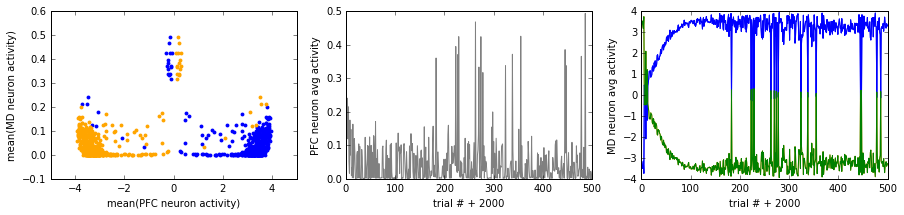

In [149]:
# Why is this the case?
plt.plot(trial_means_MD[0,:])
plt.plot(trial_means_MD[1,:])
plt.show()

In [23]:
plt.close()